# **Projet Signal**
---
### *Pornin Robin*
---
---
---
## Modélisation numérique : POC


#### **Rappel du contexte :** 

Un de nos agents s'est malencontreusement retrouvé captif lors d'une mission en terrain ennemi. Il fut par accident enfermé dans une salle des conférences, sans connexion avec l'extérieur, avec à sa disposition les outils de la salle : un simple microphone connecté au réseau de communication de la base. Nos ennemis n'ont pas tardé avant de repérer sa présence : il fut capturé pour toujours. L'idée est d'éviter que de tels accidents de reproduisent ; la question se pose : Que peut-on faire ? Et bien l'hypothèse initiale était de se servir du micro pour envoyer un message à la base, branchée par câble sur le réseau de communication, afin de les prévenir. Pour s'assurer de notre discretion, il fallait filtrer notre son et ne laisser passer que des ultrasons dans le micro...

Nous avons vu dans notre étude que nous pouvions réaliser le filtrage d'un signal numériquement. Nous allons donc abandonner l'idée d'un filtrage analogique : le signal reçu étant numérique, il est alors plus simple de le **filtrer numériquement**.

Trouvez ci-dessous un **schéma explicatif de notre chaîne de transmission** : 

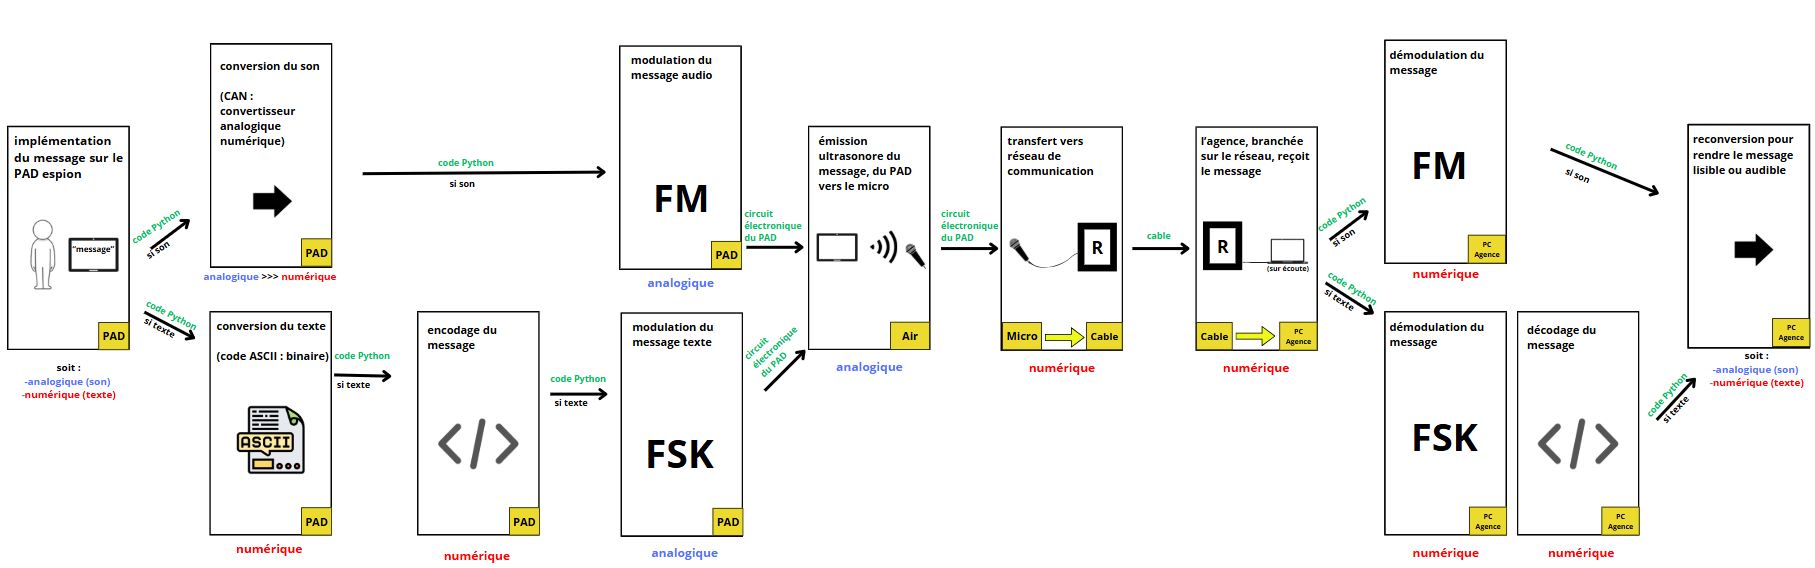


Nous sommes partis sur l'objectif suivant : Notre *POC* devra parfaitement reconstituer l'ensemble de la châine de transmission sur n'importe quelle entrée de type **texte**.

---
---
---

# **Voici notre rapport, avant de passer aux codes :**

## Impact sur la chaîne de transmission  

### Distance entre l’émission et la réception  
La distance entre l’émission (Le PAD) et la réception (Le Micro) est très courte. Cela permet d’écarter l’éventualité de la perte de données durant la transmission.  

---  

## Texte court  
Un texte court est peu volumineux. On peut donc utiliser un encodage simple comme le NRZ, sans perte d’informations. Étant donné la faible quantité de données, la modulation peut être réalisée sur peu de bits.  

### Chaîne de transmission :  
1. Conversion ASCII  
2. Encodage NRZ  
3. Modulation FSK  
4. Transmission  
5. Réception  
6. Démodulation FSK  
7. Désencodage NRZ  
8. Déconversion ASCII  

---  

## Texte volumineux  
Un texte volumineux nécessite une meilleure synchronisation au niveau de l’horloge. L’encodage Miller est adapté, car il conserve une bonne synchronisation tout en nécessitant une bande passante réduite.  
On conserve la modulation FSK, qui est robuste face aux bruits interférant avec la réception.  

### Chaîne de transmission :  
1. Conversion ASCII  
2. Encodage Miller  
3. Modulation FSK  
4. Transmission  
5. Réception  
6. Démodulation FSK  
7. Désencodage Miller  
8. Déconversion ASCII  

---  

## Fichier binaire  
Un fichier binaire possède une structure moins prévisible qu’un texte volumineux mais contient également beaucoup d’informations. L’encodage Miller reste pertinent pour les mêmes raisons. Concernant la modulation, FSK est préférée pour sa simplicité d’implémentation.  

### Chaîne de transmission :  
1. Encodage Miller  
2. Modulation FSK sur 2 bits  
3. Transmission  
4. Réception  
5. Démodulation FSK  
6. Désencodage Miller  

---  

## Son  
Dans ce cas, la source est un enregistrement vocal. Les modulations ASK, FSK et PSK sont adaptées aux fichiers numériques, tandis que la modulation FM convient mieux aux signaux audio. Elle est plus résistante aux bruits que la modulation AM.  
Pour l’encodage, la méthode Manchester est privilégiée, car elle est plus robuste face aux interférences que la méthode Miller.  

### Chaîne de transmission :  
1. Encodage Manchester  
2. Modulation FM  
3. Transmission  
4. Réception  
5. Démodulation FM  
6. Désencodage Manchester  

---  

## Explication des étapes  

### 1. Conversion binaire d’un texte  
Un texte est d’abord converti en binaire via la table ASCII. Chaque caractère est associé à un code binaire unique.  

**Exemple avec "HELLO" :**  
```
H : 01001000  
E : 01000101  
L : 01001100  
O : 01001111  
```  
Total : \(5 \times 8 = 40\) bits  

### 2. Encodage  
L’encodage permet d’assurer une transmission fiable en structurant les bits. Plusieurs méthodes existent : NRZ, Manchester, Miller, Bipolaire, etc.  

**Exemple : méthode Manchester**  
- 0 → 01  
- 1 → 10  

Encodage du message "HELLO" en Manchester :  
```
H : 01 10 01 01 10 01 01 01  
E : 01 10 01 01 01 10 01 10  
L : 01 10 01 01 10 10 01 01  
O : 01 10 01 01 10 10 10 10  
```  
Chaque bit est doublé pour assurer la synchronisation.  

### 3. Modulation  
La modulation transforme un signal numérique en signal analogique pour être transmis.  

**Exemple : modulation FSK**  
La fréquence de l’onde porteuse varie en fonction du signal binaire. Une valence de 1 signifie qu’un bit est codé par une seule fréquence.  

La modulation est essentielle pour la transmission du signal numérique via un canal analogique. Elle permet de mieux résister aux interférences et de transmettre l’information efficacement.
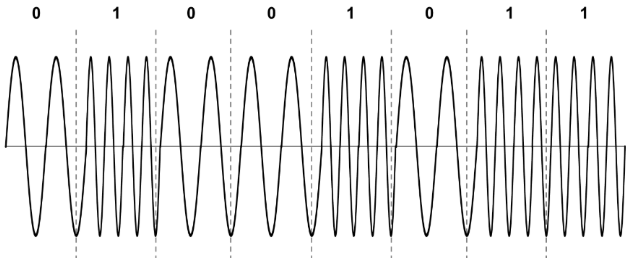



Il n’y a que deux valeurs de fréquences (modulé comme : `f0, f1, f0, f1`, etc.), donc un seul bit suffit.

- Un bit `0` est représenté par une période de `f0`.
- Un bit `1` est représenté par une période de `f1`.

FSK est choisi pour sa robustesse face au bruit et sa simplicité d'implémentation.

#### Calcul de la bande passante requise

- **Fréquences choisies** : `f0 = 18 kHz`, `f1 = 22 kHz`
- **Espacement entre fréquences** : `Δf = f1 - f0 = 4 kHz`
- **Bande passante totale** : `B = f1 + Δf = 22 + 4 = 26 kHz`
- Compatible avec la réponse fréquentielle des micros (jusqu'à `25 kHz` ou plus).

#### Temps de transmission

- **Fréquence d'échantillonnage** : `Fe = 44.1 kHz`
- **Durée d'un bit** : `T(bit) = 1 / Fe ≈ 22.7 μs`
- **Durée pour 80 bits** : `T(total) = 80 × 22.7 = 1,816 ms`

#### Texte long

- **Encodage** : `Miller`
- Nombre de bits = `8 × Nombre de caractères`

---

### 4. Transmission

La transmission peut se faire par :
- L'air (communications radio)
- Un courant électrique (ex. micro)

Pour une antenne quart d'onde : `Longueur d'onde = 4 × taille de l'antenne`

---

### 5. Démodulation

Le signal reçu doit être démodulé.

1. **Multiplier le signal par la porteuse** pour ramener la fréquence à sa valeur originale.
2. **Correspondance fréquence-binaire** :
   - `f0` → `01`
   - `f1` → `10`

---

### 6. Désencodage

1. **Transformation inverse** pour retrouver le code binaire ASCII.
2. Exemple :
   - `01001000` → `H`
   - `01000101` → `E`
   - `01001100` → `L`
   - `01001100` → `L`
   - `01001111` → `O`

Résultat : `HELLO`

---

## Chaînes de Transmission

### Texte Court

| Étape | Moyen |
|--------|--------|
| Saisie du texte | PAD |
| Conversion ASCII | Python (PAD) |
| Encodage NRZ | Python (PAD) |
| Modulation FSK | PAD |
| CNA (Diffusion) | PAD vers micro |
| CAN (Réception) | Micro |
| Transmission | Câble |
| Réception | Ordi agence |
| Démodulation | Ordi agence |
| Décodage | Ordi agence |
| Affichage | Ordi agence |

### Texte Long

| Étape | Moyen |
|--------|--------|
| Saisie du texte | PAD |
| Conversion ASCII | Python (PAD) |
| Encodage Miller | Python (PAD) |
| Modulation FSK | PAD |
| CNA (Diffusion) | PAD vers micro |
| CAN (Réception) | Micro |
| Transmission | Câble |
| Réception | Ordi agence |
| Démodulation | Ordi agence |
| Décodage | Ordi agence |
| Affichage | Ordi agence |

### Transmission de Son

| Étape | Moyen |
|--------|--------|
| Enregistrement | PAD |
| Modulation FM (20 kHz ± 3 kHz) | PAD |
| CNA (Diffusion) | PAD vers micro |
| CAN (Réception) | Micro |
| Transmission | Câble |
| Réception | Ordi agence |
| Démodulation | Ordi agence |
| Diffusion | Haut-parleurs de l'agence |



Ce document fournit une vue d'ensemble claire et structurée du processus de transmission et démodulation FSK pour différents types de messages.


---
---
---
# **CODES :**
---

# **1 - Texte court : encodage NRZ**

### Importation des libariries : ##################################################################################################################

In [161]:
import numpy as np
import matplotlib.pyplot as plt

### Définition des fonctions : ####################################################################################################################

In [164]:
def conversion_binaire(texte):
    liste_ascii = []
    for caractere in texte : 
        liste_ascii.append(ord(caractere))
    resultat = ""
    for nombre_ascii in liste_ascii :
        resultat += (bin(nombre_ascii)[2:]).zfill(8)
    return resultat

def encodage_NRZ(binaire):   # -1 si le bit est un 0 ; 1 si le bit est un 1
    resultat = []
    for bit in binaire :
        if bit == '1':
            resultat.append(1)
        else:
            resultat.append(-1)
    return resultat

'''
def encodage_NRZI(binaire):   # change d'état quand on rencontre un bit égal à 1
    resultat = []
    etat = -1  
    for bit in binaire :
        if bit == '1':
            etat = -etat  
        resultat.append(etat)
    return resultat
'''

def modulation_FSK(bit, t, f0, f1):
    if bit == 1 :
        freq = f1
    if bit == -1 :
        freq = f0
    return A * np.sin(2 * np.pi * freq * t)

def decodage_NRZ(encode):
    resultat = ""
    for bit in encode :
        if bit == 1:
            resultat += "1"
        elif bit == -1:
            resultat += "0"
    return resultat

### Saisie du message : ###########################################################################################################################

In [167]:
message = input("Saisir le message : ")
print(f"\nVotre message est : ' {message} '\n")

Saisir le message :  Livrable 4



Votre message est : ' Livrable 4 '



### Encodage NRZ: ####################################################################################################################################

Votre message en binaire est : 01001100011010010111011001110010011000010110001001101100011001010010000000110100

Votre message encodé NRZ est :  [-1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1]

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


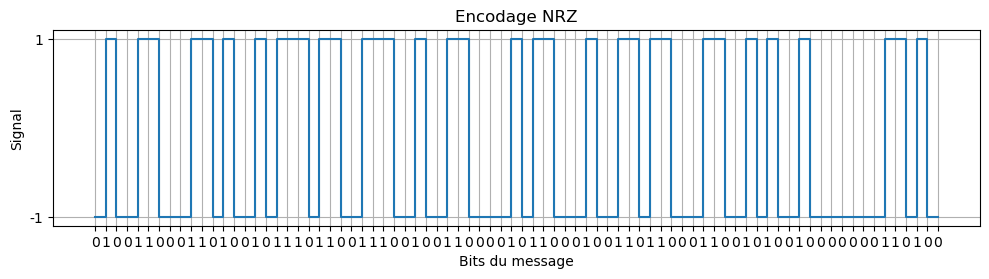

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------



In [169]:
message_binaire = conversion_binaire(message)
print(f"Votre message en binaire est : {message_binaire}\n")

message_NRZ = encodage_NRZ(message_binaire)
print(f"Votre message encodé NRZ est :  {message_NRZ}\n")

'''
message_NRZI = encodage_NRZI(message_binaire)
print(f"Votre message encodé NRZI est : {message_NRZI}\n")
'''
print("-"*150)
print("-"*150)

t = np.arange(len(message_binaire))
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.step(t, message_NRZ, where='post', label="Encodage NRZ")
plt.yticks([-1, 1], ['-1', '1'])
plt.xticks(t, list(message_binaire))
plt.xlabel("Bits du message")
plt.ylabel("Signal")
plt.title("Encodage NRZ")
plt.grid()

'''
plt.subplot(2, 1, 2)
plt.step(t, message_NRZI, where='post', label="Encodage NRZI")
plt.yticks([-1, 1], ['-1', '1'])
plt.xticks(t, list(message_binaire))
plt.xlabel("Bits du message")
plt.ylabel("Signal")
plt.title("Encodage NRZI")
plt.grid()
'''

plt.tight_layout()
plt.show()

print("-"*150)
print("-"*150)
print("")

### Modulation FSK : ################################################################################################################################

In [171]:
Fe = 44100  # Fréquence d'échantillonnage
Tb = 0.01   # Durée d'un bit (s)
f0 = 20000  # Fréquence pour le bit 0
f1 = 19000  # Fréquence pour le bit 1
A  = 1      # Amplitude des signaux (égale à 1 pour les deux)

t = np.linspace(0, Tb, int(Fe * Tb), endpoint=False)  # temps pour un bit
signal_FSK = []
for bit in message_NRZ:
    signal_FSK.extend(modulation_FSK(bit, t, f0, f1))
print(signal_FSK[:10])  # Affiche les 10 premières valeurs sinon il y en aura trop

[0.0, 0.28794045010251906, -0.5514913743150942, 0.7683291217331284, -0.9200868048537143, 0.9939100368057142, -0.9835457412105524, 0.8898718088114687, -0.7208227371708802, 0.49071755200393835]


### Visualisation sur un nombre N de Bits choisi (les N premiers Bits) : ############################################################################


Visualiser modulation sur combien de bits ? (de 1 à 80) (80 = tout le message) )
>>>  7


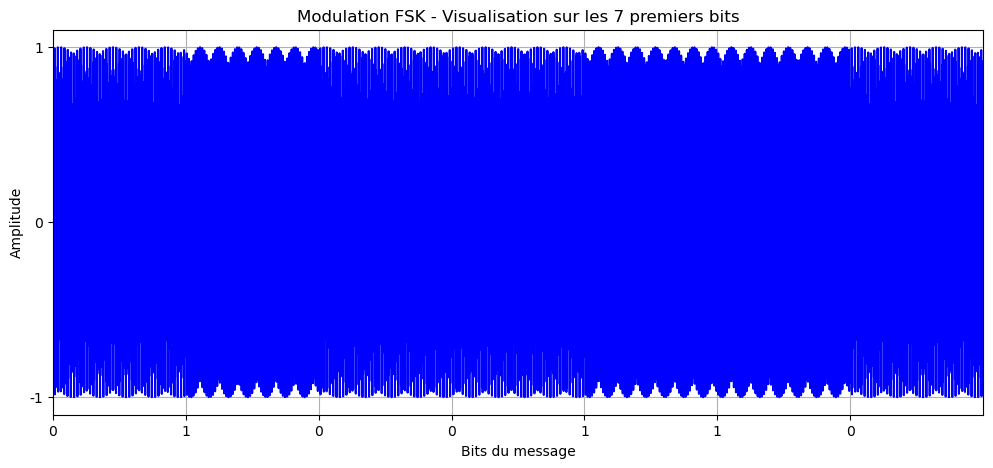

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------




In [173]:
nb_bits = len(message_NRZ)
t_FSK = np.linspace(0, nb_bits * Tb, len(signal_FSK), endpoint=False)
nb_bits_zoom = int(input(f"Visualiser modulation sur combien de bits ? (de 1 à {len(message_binaire)}) ({len(message_binaire)} = tout le message) )\n>>> ") ) 
index_zoom = int(nb_bits_zoom * Fe * Tb)  
bit_positions = np.arange(0, nb_bits * Tb, Tb)

plt.figure(figsize=(12, 5))
plt.plot(t_FSK[:index_zoom], signal_FSK[:index_zoom], label="Signal FSK", color='b')
plt.xlabel("Bits du message")
plt.ylabel("Amplitude")
plt.title(f"Modulation FSK - Visualisation sur les {nb_bits_zoom} premiers bits")
plt.xlim(0, nb_bits_zoom * Tb)  
plt.xticks(bit_positions[:nb_bits_zoom], list(message_binaire[:nb_bits_zoom]), rotation=0)
plt.yticks([-1, 0, 1], ["-1", "0", "1"])
plt.grid()
plt.show()

#print(f"Le signal encodé NRZ puis modulé FSK est : {signal_FSK}")
print("-"*150)
print("-"*150)
print("")
print("")

### Démodulation FSK : ##################################################################################################################################


In [175]:
Ns = int(Tb*Fe)

# Démodulation avec la méthode des trapèzes
demodulation = []
for i in range(0, len(signal_FSK), Ns):
    segment = signal_FSK[i:i+Ns]                                   # segment de courbe correspondant a un bit     
    t2 = np.linspace(0, Tb, Ns, endpoint=False)
    integral0 = np.trapz(segment * np.sin(2 * np.pi * f0 * t2))
    integral1 = np.trapz(segment * np.sin(2 * np.pi * f1 * t2))
    if integral0 > integral1:
        demodulation.append(-1)
    else:
        demodulation.append(1)
        
message_démodulé = demodulation
print("Message encodé NRZ démodulé :", message_démodulé, "\n")

Message encodé NRZ démodulé : [-1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1] 



### Décodage NRZ : #####################################################################################################################################


In [177]:
message_décodé = decodage_NRZ(message_démodulé)
print("Message démodulé ET décodé :", message_décodé, "\n")

Message démodulé ET décodé : 01001100011010010111011001110010011000010110001001101100011001010010000000110100 



### Reconversion en message lisible : ##############################################################################################################

In [179]:
tab = [0 for j in range(len(message))]
binaire = message_binaire
long_binaire = len(binaire)
binaire = message_binaire
for i in range(len(message)):
    v = binaire[:((long_binaire)//len(message))]
    tab[i] = v
    binaire = binaire[((long_binaire)//len(message)):]
resultat =  []
for valeur in tab :
    resultat.append(int(valeur, 2))
final = ""
for nombre in resultat :
    final += chr(nombre)
print("Message reçu : '", final, "'")

Message reçu : ' Livrable 4 '


---

# **Texte long : encodage Manchester**

### Saisie du message : 

In [187]:
import matplotlib.pyplot as plt
import numpy as np


#Création du message
message=input("Transférer un message ?")

#Passage ASCII
Code_Binaire = "" 
for i in range(0, len(message)):
    Code_Binaire += bin(ord(message[i]))[2:].zfill(8)
print("Le texte converti (ASCII) : ",Code_Binaire)
print(" ")

Transférer un message ? Projet Signal


Le texte converti (ASCII) :  01010000011100100110111101101010011001010111010000100000010100110110100101100111011011100110000101101100
 


### Encodage Manchester :

In [189]:
Encodage = []    
for bit in Code_Binaire:
    if bit == '0':
        Encodage.extend([-1,1])
    else:
        Encodage.extend([1,-1])
print("Encodage : ",Encodage)

Encodage :  [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1]


### Modulation FSK :

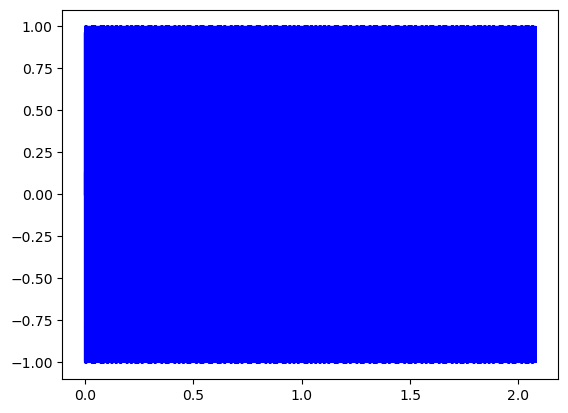

In [191]:
Fe = 44100                                                                
Nbits = len(Encodage)                                          
V_b = 0.01
fp1 = 19000                 
fp2 = 21000
Ns = int(V_b*Fe)
t = np.linspace(0,V_b,int(Ns), endpoint=False)           
FSK = []          


# On réalise la modulation FSK
      # Initialisation d'une liste nommée FSK

for bit in Encodage:                        
    if bit == -1:
        FSK.extend(np.sin(2*np.pi*fp1*t))
    else:
        FSK.extend(np.sin(2*np.pi*fp2*t))    


#t1 = np.linspace(0,Nbits*max(1/fp1,2/fp2),len(FSK))
t1 = np.linspace(0,Nbits*V_b,len(FSK))

plt.plot(t1,FSK,'blue')
plt.show()

### Visualisation sur un nombre N de Bits choisi (les N premiers Bits) : #########

Visualiser modulation sur combien de bits ? (de 1 à 104) (104 = tout le message) )
>>>  4


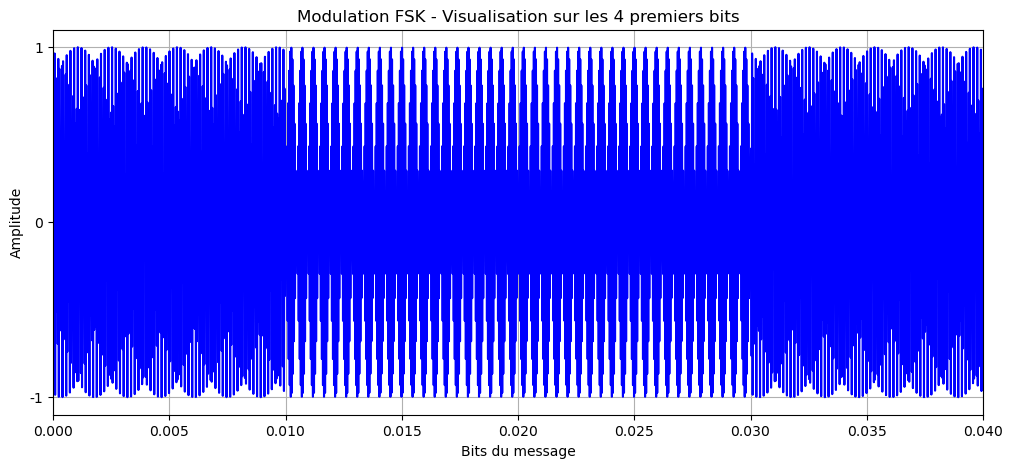

In [193]:
nb_bits_zoom = int(input(f"Visualiser modulation sur combien de bits ? (de 1 à {len(Code_Binaire)}) ({len(Code_Binaire)} = tout le message) )\n>>> ") ) 
index_zoom = int(nb_bits_zoom * Fe * V_b)  

plt.figure(figsize=(12, 5))
plt.plot(t1[:index_zoom], FSK[:index_zoom], label="Signal FSK", color='b')
plt.xlabel("Bits du message")
plt.ylabel("Amplitude")
plt.title(f"Modulation FSK - Visualisation sur les {nb_bits_zoom} premiers bits")
plt.xlim(0, nb_bits_zoom * V_b)  
plt.yticks([-1, 0, 1], ["-1", "0", "1"])
plt.grid()
plt.show()

### Démodulation FSK :

In [195]:
Ns = int(V_b*Fe)

# Démodulation avec la méthode des trapèzes
Demodulation = []
for i in range(0, len(FSK), Ns):
    segment = FSK[i:i+Ns]         # Extraire un segment correspondant à un bit
    t2 = np.linspace(0,V_b,Ns,endpoint=False)
    # Intégration par la méthode des trapèzes
    integral1 = np.trapz(segment * np.sin(2 * np.pi * fp1 * t2))
    integral2 = np.trapz(segment * np.sin(2 * np.pi * fp2 * t2))
    # Décision
    if integral1 > integral2:
        Demodulation.append(-1)
    else:
        Demodulation.append(1)

# Résultat
print("Demodulation :", Demodulation)

Demodulation : [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1]


### Décodage Manchester :


In [197]:
Desencodage = ''    
for i in range(0,len(Demodulation),2):
    if Demodulation[i:i+2] == [-1,1]:
        Desencodage += '0'
    else:
        Desencodage += '1'
print("Desencodage : ",Desencodage)

Desencodage :  01010000011100100110111101101010011001010111010000100000010100110110100101100111011011100110000101101100


### Retranscription :

In [199]:
Retranscription = ""
for i in range(0, len(Desencodage), 8):
    byte = Desencodage[i:i+8]  # Extraire un bloc de 8 bits
    Retranscription += chr(int(byte, 2))  # Convertir le bloc binaire en caractère ASCII

print("Le message décodé est :", Retranscription)

Le message décodé est : Projet Signal


---
---
---